In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib

In [5]:
# load apple stock data
import pandas as pd
Apple=pd.read_csv("../data/finance/AAPL.csv")
Amazon=pd.read_csv("../data/finance/AMZN.csv")
Google=pd.read_csv("../data/finance/GOOG.csv")
microsoft=pd.read_csv("../data/finance/MSFT.csv")
meta=pd.read_csv("../data/finance/META.csv")
nvidia=pd.read_csv("../data/finance/NVDA.csv")

In [17]:
Google.head()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
0,2009-01-02,7.948608,7.960977,7.557264,7.633949,144961322,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,8.115089,8.194003,7.792268,7.940692,196293007,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,8.263762,8.430492,8.074027,8.237046,257971329,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,7.965677,8.185839,7.885034,8.121770,180453860,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,8.044340,8.044340,7.850152,7.873406,144567852,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:


# Moving Averages
Google["SMA_20"] = talib.SMA(Google["Close"], timeperiod=20)
Google["SMA_50"] = talib.SMA(Google["Close"], timeperiod=50)

# RSI
Google["RSI_14"] = talib.RSI(Google["Close"], timeperiod=14)
# MACD
Google["MACD"], Google["MACD_Signal"], Google["MACD_Hist"] = talib.MACD(
    Google["Close"],
    fastperiod=12,
    slowperiod=26,
    signalperiod=9
)

In [19]:
Google["SMA_20"] = talib.SMA(Google["Close"], timeperiod=20)
Google["RSI_14"] = talib.RSI(Google["Close"], timeperiod=14)
Google["MACD"], Google["MACD_Signal"], Google["MACD_Hist"] = talib.MACD(
	Google["Close"], fastperiod=12, slowperiod=26, signalperiod=9
)

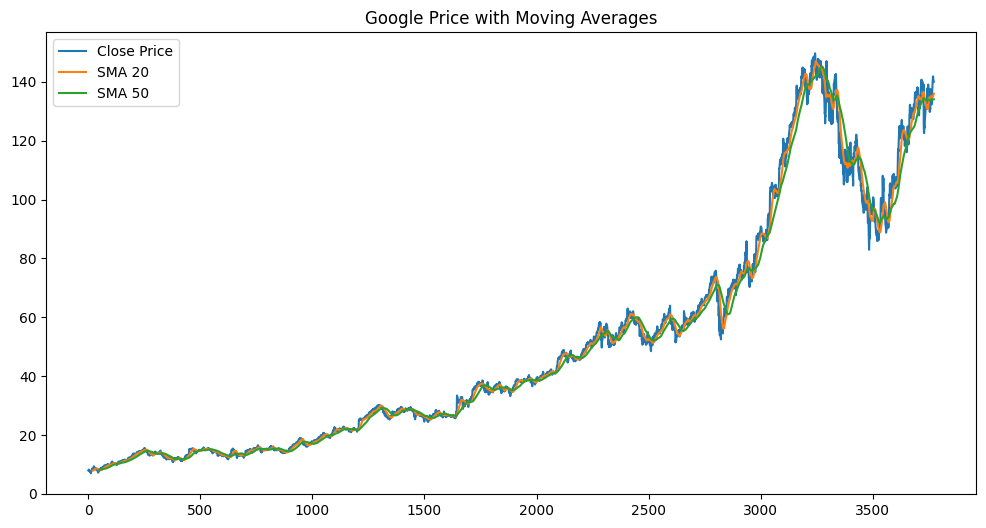

In [25]:

plt.figure(figsize=(12,6))
plt.plot(Google["Close"], label="Close Price")
plt.plot(Google["SMA_20"], label="SMA 20")
plt.plot(Google["SMA_50"], label="SMA 50")
plt.legend()
plt.title("Google Price with Moving Averages")
plt.show()

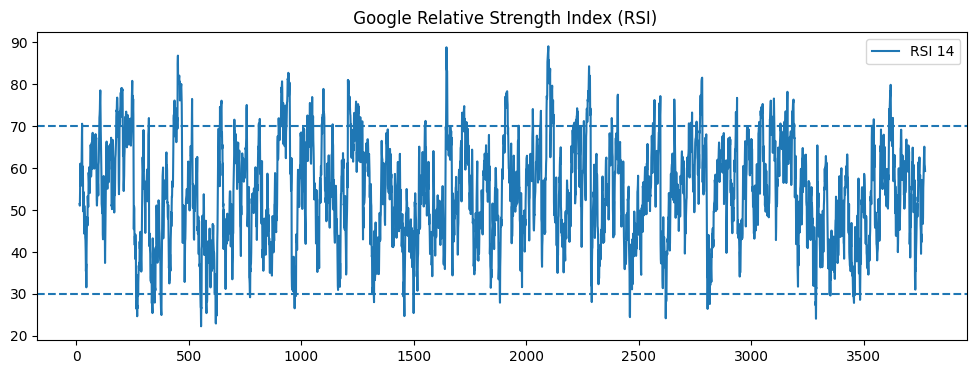

In [ ]:

plt.figure(figsize=(12,4))
plt.plot(Google["RSI_14"], label="RSI 14")
plt.axhline(70, linestyle="--")
plt.axhline(30, linestyle="--")
plt.legend()
plt.title(" Google Relative Strength Index (RSI)")
plt.show()

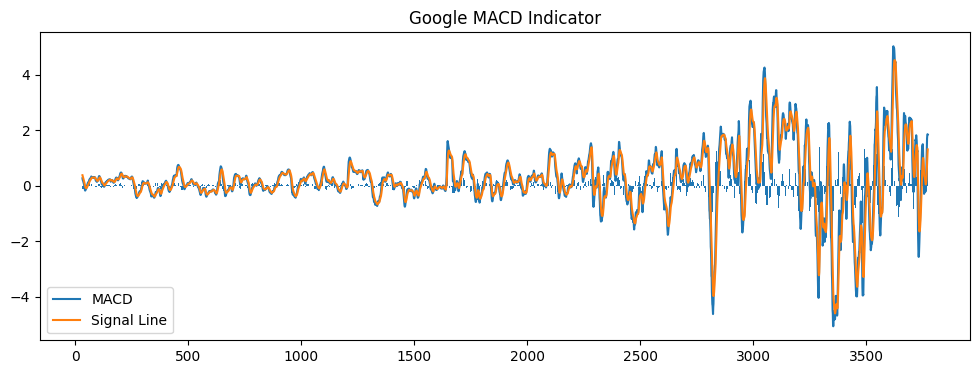

In [16]:
plt.figure(figsize=(12,4))
plt.plot(Google["MACD"], label="MACD")
plt.plot(Google["MACD_Signal"], label="Signal Line")
plt.bar(Google.index, Google["MACD_Hist"])
plt.legend()
plt.title("Google MACD Indicator")
plt.show()